In [23]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("StudentPerformanceFactors.csv")
print(df.head())


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [5]:
print(df.columns.tolist())

['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']


Objective:
To explore how socio-economic and behavioral factors relate to student academic performance using exploratory data analysis, without building predictive models.

## Step 2: Column Role Classification

Before performing exploratory analysis, the dataset columns were classified based on their analytical role to ensure a structured and meaningful investigation.

### Outcome Variable (Primary Measure of Performance)
- **Exam_Score**  
  Represents the final academic performance of students and serves as the main outcome variable for analysis.

---

### Numerical Explanatory Variables (Behavioral & Academic Factors)
These variables quantify student habits, prior performance, and measurable inputs that may influence exam scores.

- **Hours_Studied** – Daily or weekly study time invested by the student  
- **Attendance** – Classroom attendance rate  
- **Sleep_Hours** – Average sleep duration  
- **Previous_Scores** – Academic performance in previous assessments  
- **Tutoring_Sessions** – Number of additional tutoring sessions attended  
- **Physical_Activity** – Level or duration of physical activity  
- **Distance_from_Home** – Distance between home and school  

---

### Categorical Explanatory Variables (Socio-economic, Environmental & Psychological Factors)
These variables describe context, background, and qualitative influences on student performance.

- **Parental_Involvement** – Degree of parental engagement in academics  
- **Access_to_Resources** – Availability of learning materials and facilities  
- **Extracurricular_Activities** – Participation in non-academic activities  
- **Motivation_Level** – Student’s self-reported motivation  
- **Internet_Access** – Availability of internet connectivity  
- **Family_Income** – Household income bracket  
- **Teacher_Quality** – Perceived or rated teaching quality  
- **School_Type** – Type of educational institution  
- **Peer_Influence** – Influence of peers on academic behavior  
- **Learning_Disabilities** – Presence of learning-related challenges  
- **Parental_Education_Level** – Highest education level of parents  
- **Gender** – Student gender  

---

### Analytical Note
The outcome variable (**Exam_Score**) will be analyzed across numerical and categorical explanatory variables to identify patterns, associations, and performance gaps.  
No causal claims or predictive modeling will be performed; the analysis is strictly exploratory and descriptive in nature.


In [6]:
list(df.columns)

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Gender',
 'Exam_Score']

In [7]:
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].unique())



Hours_Studied:
[23 19 24 29 25 17 21  9 10 14 22 15 12 20 11 13 16 18 31  8 26 28  4 35
 27 33 36 43 34  1 30  7 32  6 38  5  3  2 39 37 44]

Attendance:
[ 84  64  98  89  92  88  78  94  80  97  83  82  68  60  70  75  99  74
  65  62  91  90  66  69  72  63  61  86  77  71  67  87  73  96 100  81
  95  79  85  76  93]

Parental_Involvement:
['Low' 'Medium' 'High']

Access_to_Resources:
['High' 'Medium' 'Low']

Extracurricular_Activities:
['No' 'Yes']

Sleep_Hours:
[ 7  8  6 10  9  5  4]

Previous_Scores:
[ 73  59  91  98  65  89  68  50  80  71  88  87  97  72  74  70  82  58
  99  84 100  75  54  90  94  51  57  66  96  93  56  52  63  79  81  69
  95  60  92  77  62  85  78  64  76  55  86  61  53  83  67]

Motivation_Level:
['Low' 'Medium' 'High']

Internet_Access:
['Yes' 'No']

Tutoring_Sessions:
[0 2 1 3 4 5 6 7 8]

Family_Income:
['Low' 'Medium' 'High']

Teacher_Quality:
['Medium' 'High' 'Low' nan]

School_Type:
['Public' 'Private']

Peer_Influence:
['Positive' 'Negative' 'Neu

In [8]:
df.describe

<bound method NDFrame.describe of       Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
6602             25          69                 High              Medium   
6603             23          76                 High              Medium   
6604             20          90               Medium                 Low   
6605             10          86                 High                High   
6606             15          67               Medium                 Low   

     Extracurricular_Activities  Sleep_Hours  Previou

In [9]:
df.select_dtypes(include='number').agg(['min', 'max'])


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
min,1,60,4,50,0,0,55
max,44,100,10,100,8,6,101


In [11]:
df.loc[df['Exam_Score'] > 100, 'Exam_Score'] = 100
df.select_dtypes(include='number').agg(['min', 'max'])

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
min,1,60,4,50,0,0,55
max,44,100,10,100,8,6,100


In [12]:
(df['Exam_Score'] == 100).sum()


np.int64(2)

## Step 3: Data Sanity & Validity Checks

Basic data validation checks were performed before exploratory analysis.  
All numerical variables were verified to fall within realistic ranges.

During this process, a small number of exam score values were found (2 to be exact) to exceed the valid maximum of 100. These values were treated as data inconsistencies and were capped at 100 to preserve realistic score boundaries.

No duplicate records were observed, and the dataset was deemed suitable for further exploratory analysis.


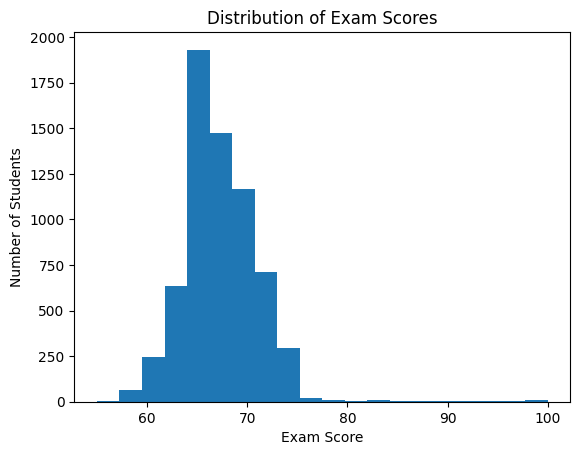

In [15]:
import matplotlib.pyplot as plt

plt.hist(df['Exam_Score'], bins=20)
plt.xlabel('Exam Score')
plt.ylabel('Number of Students')
plt.title('Distribution of Exam Scores')
plt.show()


**Observation:**  
Exam scores are concentrated primarily in the 60–70 range, with relatively few students scoring below 55 or above 80.

**Interpretation:**  
The distribution suggests that most students achieve moderate performance levels, while very high exam scores are comparatively rare. The presence of a slight right skew indicates a small subset of high-performing students.

**Implication:**  
Subsequent analyses should focus on identifying factors that contribute to incremental performance improvements within this dominant mid-score range, rather than only extreme outcomes.


In [16]:
df['Exam_Score'].median(), df['Exam_Score'].mean()


(np.float64(67.0), np.float64(67.23550779476312))

The mean (≈67.24) and median (67.0) exam scores are nearly identical, indicating that the distribution of exam scores is approximately symmetric with no strong skewness.


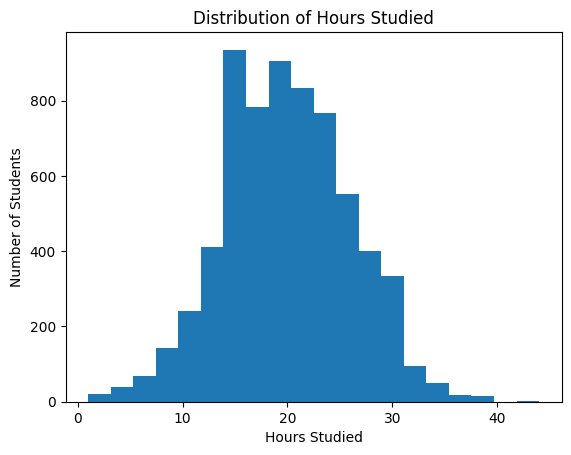

In [17]:
plt.hist(df['Hours_Studied'], bins=20)
plt.xlabel('Hours Studied')
plt.ylabel('Number of Students')
plt.title('Distribution of Hours Studied')
plt.show()


**Observation:**  
Hours studied follows an approximately bell-shaped distribution, with most students studying between 15 and 25 hours. Extremely low or high study durations are uncommon.

**Interpretation:**  
The distribution indicates a moderate and realistic range of study behavior among students, with sufficient variability to potentially influence academic performance.

**Implication:**  
Hours studied is likely to be a meaningful explanatory variable in subsequent analyses, as it exhibits balanced spread without being dominated by extreme values.


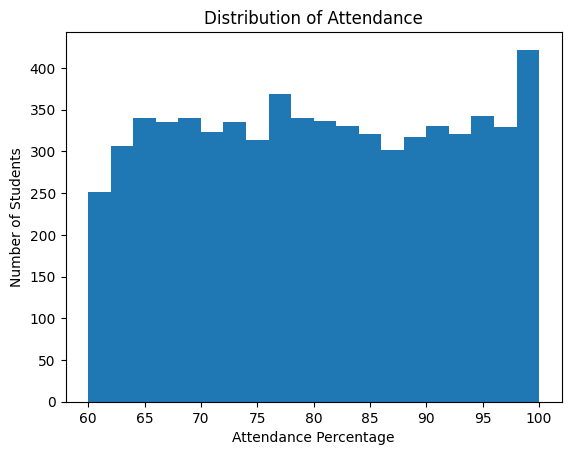

In [18]:
plt.hist(df['Attendance'], bins=20)
plt.xlabel('Attendance Percentage')
plt.ylabel('Number of Students')
plt.title('Distribution of Attendance')
plt.show()


**Observation:**  
Attendance percentages are concentrated toward the higher end of the scale, with most students exhibiting attendance levels above 75%.

**Interpretation:**  
The distribution indicates limited variability in attendance, suggesting that regular class attendance is common across the student population.

**Implication:**  
While attendance is likely necessary for academic success, its limited spread may reduce its explanatory power compared to more variable factors such as study hours.


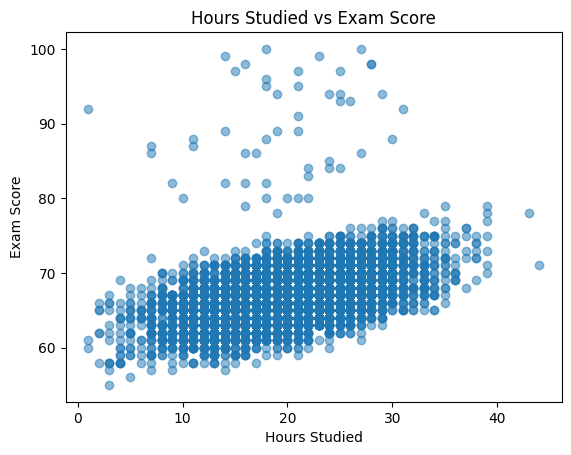

In [19]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'], alpha=0.5)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Hours Studied vs Exam Score')
plt.show()


**Observation:**  
Exam scores generally increase with higher study hours, indicating a positive association between the two variables. However, substantial variability exists at most study-hour levels.

**Interpretation:**  
While increased study time is associated with better academic performance, the relationship is not perfectly linear. Beyond a certain threshold, additional study hours appear to yield diminishing improvements in exam scores.

**Implication:**  
Study duration is an important but insufficient factor on its own; other academic, behavioral, and contextual variables likely contribute to performance differences.


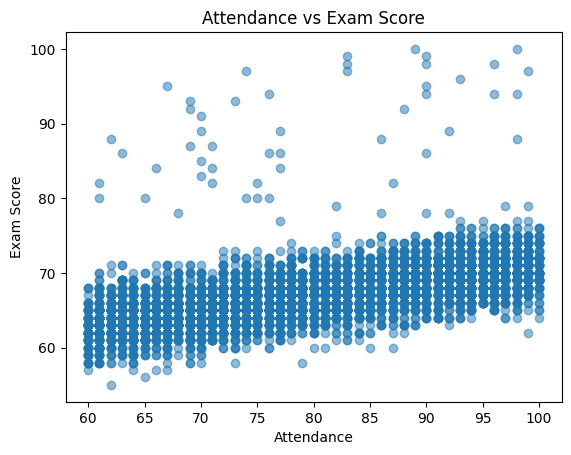

In [21]:
plt.scatter(df['Attendance'], df['Exam_Score'], alpha=0.5)
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.title('Attendance vs Exam Score')
plt.show()

**Observation:**  
Exam scores show a slight upward trend with increasing attendance; however, the spread of scores remains wide across most attendance levels.

**Interpretation:**  
Although regular attendance is associated with marginally higher exam scores, the limited variability in attendance reduces its ability to strongly explain performance differences.

**Implication:**  
Attendance appears to be a necessary but insufficient factor for academic success, suggesting that additional factors play a larger role in differentiating student outcomes.


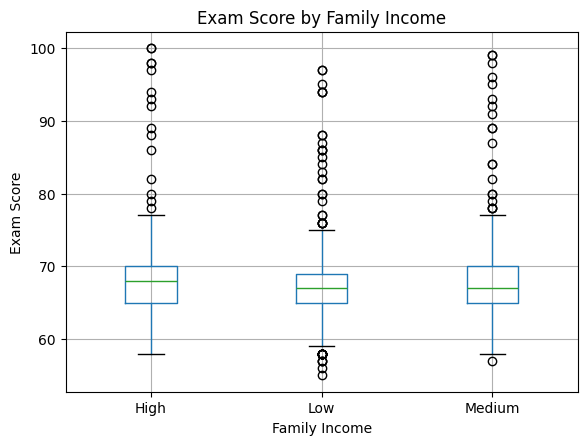

In [22]:
df.boxplot(column='Exam_Score', by='Family_Income')
plt.title('Exam Score by Family Income')
plt.suptitle('')
plt.xlabel('Family Income')
plt.ylabel('Exam Score')
plt.show()


**Observation:**  
Students from higher family income groups exhibit slightly higher median exam scores compared to lower income groups, though the distributions overlap substantially across all categories.

**Interpretation:**  
Family income shows a modest association with academic performance, suggesting that access to resources may contribute to improved outcomes, but does not fully explain score variability.

**Implication:**  
Socio-economic background plays a supporting role in academic achievement, while individual effort and other contextual factors remain critical contributors.


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    'Hours_Studied',
    'Attendance',
    'Sleep_Hours',
    'Previous_Scores',
    'Tutoring_Sessions',
    'Physical_Activity',
    'Exam_Score'
]

corr = df[num_cols].corr()


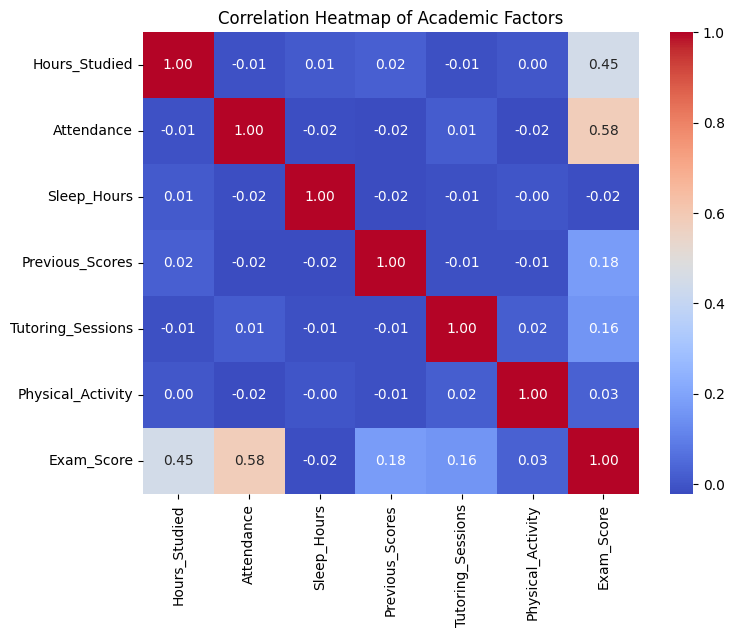

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Academic Factors')
plt.show()


## Step 6: Correlation Analysis

The correlation heatmap highlights attendance and study hours as the strongest numerical variables associated with exam performance.

**Key Observations:**
- Attendance shows the strongest positive correlation with exam score (0.58), indicating a meaningful association with academic outcomes.
- Hours studied also exhibits a moderate positive correlation (0.45), reinforcing its importance as a performance-related factor.
- Previous scores and tutoring sessions display weak correlations, suggesting limited linear predictive value.
- Sleep hours and physical activity show negligible linear relationships with exam scores.

**Interpretation:**  
Academic engagement factors such as attendance and study effort appear more strongly associated with exam performance than lifestyle or background-related variables within this dataset.


## Final Conclusions

- Exam scores in the dataset are concentrated around the mid-60s, indicating a predominantly average-performing student population with relatively few extreme outcomes.

- Study effort, measured through hours studied, shows a clear and consistent positive association with exam performance, though the relationship exhibits diminishing returns beyond moderate study durations.

- Attendance demonstrates the strongest linear association with exam scores among the numerical variables, highlighting the importance of consistent classroom engagement, even in a population where attendance is generally high.

- Socio-economic context, represented by family income, is associated with modest differences in exam performance. Higher income groups tend to have slightly higher median scores, but substantial overlap across income categories suggests income alone does not determine academic success.

- Previous academic scores and tutoring sessions show only weak correlations with current exam performance, indicating that past outcomes and external academic support are not sufficient predictors on their own.

- Lifestyle-related factors such as sleep hours and physical activity exhibit negligible linear relationships with exam scores, suggesting their effects, if any, may be indirect or non-linear.

- Overall, the analysis indicates that academic engagement factors (attendance and study effort) are more strongly associated with exam outcomes than background or lifestyle variables, while no single factor fully explains st
